# RV precision comparision
Compare rv precision to published results.

Jason Neal
15th Feburary 2015

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the precision results

In [118]:
old_precision_file = "../data/precision_data_paper2015.txt"
df_pub = pd.read_table(old_precision_file)
df_pub.columns
# df_old_corrected = ...

df_pub.head()

,Simulation,RV_Cond_1[m/s],RV_Cond_2[m/s],RV_Cond_3[m/s]
0,M0-Z-1.0-60k,8.9,26.1,9.3
1,M0-Z-1.0-80k,6.0,17.1,6.2
2,M0-Z-1.0-100k,4.5,12.8,4.6
3,M0-Z-5.0-60k,13.6,38.9,14.0
4,M0-Z-5.0-80k,10.6,30.5,10.9


In [119]:
new_chunks_file = "../data/old_fluxnorm_precision_results_2017.txt"
df_old_fluxnorm = pd.read_table(new_chunks_file)
df_old_fluxnorm=df_old_fluxnorm.rename(columns = {'# id':'Simulation'})
# Round to 1 dp.
df_old_fluxnorm.prec_1 = np.round(df_old_fluxnorm.prec_1, 1)
df_old_fluxnorm.prec_2 = np.round(df_old_fluxnorm.prec_2, 1)
df_old_fluxnorm.prec_3 = np.round(df_old_fluxnorm.prec_3, 1)
df_old_fluxnorm.head()

,Simulation,prec_1,prec_2,prec_3
0,M0-Z-1.0-60k,8.9,14.7,9.3
1,M0-Z-1.0-80k,6.0,9.8,6.2
2,M0-Z-1.0-100k,4.5,7.4,4.6
3,M0-Z-5.0-60k,13.6,22.1,14.0
4,M0-Z-5.0-80k,10.6,17.2,10.9


In [120]:
new_snrnorm_file = "../data/precision_results_2017.txt"
df_new = pd.read_table(new_snrnorm_file)
df_new=df_new.rename(columns = {'# id':'Simulation'})
# Round to 1dp
df_new.prec_1 = np.round(df_new.prec_1, 1)
df_new.prec_2 = np.round(df_new.prec_2, 1)
df_new.prec_3 = np.round(df_new.prec_3, 1)
df_new.head()


,Simulation,prec_1,prec_2,prec_3
0,M0-Z-1.0-60k,9.0,14.8,9.3
1,M0-Z-1.0-80k,6.0,9.9,6.2
2,M0-Z-1.0-100k,4.5,7.5,4.7
3,M0-Z-5.0-60k,13.7,22.4,14.2
4,M0-Z-5.0-80k,10.7,17.4,11.0


In [121]:
# Check all rows are the same between tables.
assert np.all(df_new.Simulation == df_old_fluxnorm.Simulation)
assert np.all(df_pub.Simulation == df_new.Simulation)

In [122]:
# Header names Simulation	RV_Cond_1[m/s]	RV_Cond_2[m/s]	RV_Cond_3[m/s]
print(df_pub.columns)
print(df_old_fluxnorm.columns)
print(df_new.columns)

Index(['Simulation', 'RV_Cond_1[m/s]', 'RV_Cond_2[m/s]', 'RV_Cond_3[m/s]'], dtype='object')
Index(['Simulation', 'prec_1', 'prec_2', 'prec_3'], dtype='object')
Index(['Simulation', 'prec_1', 'prec_2', 'prec_3'], dtype='object')


## Compare results of fixing the mask bug. 
Effects condition 2.

For condition_2.
Number of Simulations that improve precision from fixing clumping = 69
Number of Simulations that worsen precision from fixing clumping = 111


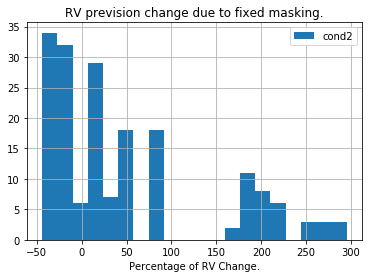

In [123]:
# Comapre between df_pub and df_old_fluxnorm

# Assert that Precision 1 and 3 do not change from clumping bug.
# print(df_old_fluxnorm["prec_1"] == df_pub["RV_Cond_1[m/s]"])
# print("A simulation that is not equal, id {}, published {}, new {}".format(df_pub.Simulation[25], df_pub["RV_Cond_1[m/s]"][25], df_old_fluxnorm.prec_1[25]))

# the +/- 0.1 accounts for any rounding errors in cond_1 and cond_3
assert np.all((df_old_fluxnorm["prec_1"] == df_pub["RV_Cond_1[m/s]"]) | (df_pub["RV_Cond_1[m/s]"] - 0.1 <= df_old_fluxnorm["prec_1"]) | (df_old_fluxnorm["prec_1"] <= df_pub["RV_Cond_1[m/s]"] + 0.1))
assert np.all((df_old_fluxnorm["prec_3"] == df_pub["RV_Cond_3[m/s]"]) | (df_pub["RV_Cond_3[m/s]"] - 0.1 <= df_old_fluxnorm["prec_3"]) | (df_old_fluxnorm["prec_3"] <= df_pub["RV_Cond_3[m/s]"] + 0.1))

# Count number of percision in cond 2 that decreased
print("For condition_2.")
cond_2_up = (df_old_fluxnorm["prec_2"] > df_pub["RV_Cond_2[m/s]"]).sum()
cond_2_down = (df_old_fluxnorm["prec_2"] < df_pub["RV_Cond_2[m/s]"]).sum()
print("Number of Simulations that improve precision from fixing clumping = {}".format(cond_2_down))
print("Number of Simulations that worsen precision from fixing clumping = {}".format(cond_2_up))

# Percentage of change
# 100 * (new - old) / old
percent_diff = 100 * (df_old_fluxnorm["prec_2"] - df_pub["RV_Cond_2[m/s]"]) / df_pub["RV_Cond_2[m/s]"]

percent_diff.hist(bins=20, label="cond2")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to fixed masking.")
plt.show()


Number of Simulations that improve precision from fixing clumping = 0
Number of Simulations that worsen precision from fixing clumping = 109
Number of Simulations that improve precision from fixing clumping = 1
Number of Simulations that worsen precision from fixing clumping = 120
Number of Simulations that improve precision from fixing clumping = 0
Number of Simulations that worsen precision from fixing clumping = 106


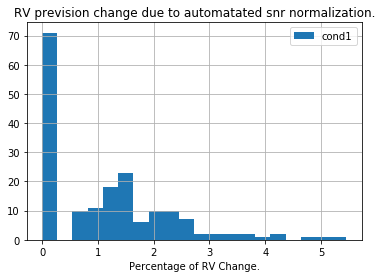

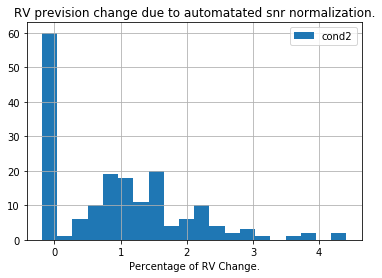

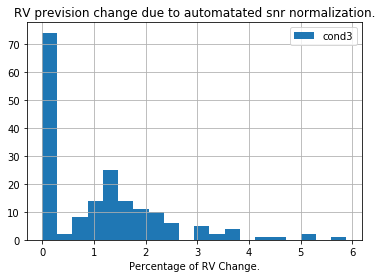

These show that the change due to automatic normalization is less then 3%, and over 1/3 less than 0.25% change
The normalization only worsens the precision (increases value).


In [124]:
# Compare results of changing normalization. 
# Comapre between df_new and df_old_fluxnorm

# Calcualte percentage difference inc precsion of cond 1, 2, 3
# With 1 and 3 testing the normalization.
# Count number of percision in cond 2 that decreased
cond_1_up = (df_new["prec_1"] > df_old_fluxnorm["prec_1"]).sum()
cond_1_down = (df_new["prec_1"] < df_old_fluxnorm["prec_1"]).sum()
cond_2_up = (df_new["prec_2"] > df_old_fluxnorm["prec_2"]).sum()
cond_2_down = (df_new["prec_2"] < df_old_fluxnorm["prec_2"]).sum()
cond_3_up = (df_new["prec_3"] > df_old_fluxnorm["prec_3"]).sum()
cond_3_down = (df_new["prec_3"] < df_old_fluxnorm["prec_3"]).sum()
print("Number of Simulations that improve precision from fixing clumping = {}".format(cond_1_down))
print("Number of Simulations that worsen precision from fixing clumping = {}".format(cond_1_up))
print("Number of Simulations that improve precision from fixing clumping = {}".format(cond_2_down))
print("Number of Simulations that worsen precision from fixing clumping = {}".format(cond_2_up))
print("Number of Simulations that improve precision from fixing clumping = {}".format(cond_3_down))
print("Number of Simulations that worsen precision from fixing clumping = {}".format(cond_3_up))


# Percentage of change
# 100 * (new - old) / old
cond1_percent_diff = 100 * (df_new["prec_1"] - df_old_fluxnorm["prec_1"]) / df_old_fluxnorm["prec_1"]
cond2_percent_diff = 100 * (df_new["prec_2"] - df_old_fluxnorm["prec_2"]) / df_old_fluxnorm["prec_2"]
cond3_percent_diff = 100 * (df_new["prec_3"] - df_old_fluxnorm["prec_3"]) / df_old_fluxnorm["prec_3"]

cond1_percent_diff.hist(bins=20, label="cond1")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to automatated snr normalization.")
plt.show()

cond2_percent_diff.hist(bins=20, label="cond2")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to automatated snr normalization.")
plt.show()

cond3_percent_diff.hist(bins=20, label="cond3")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to automatated snr normalization.")
plt.show()

print("These show that the change due to automatic normalization is less then 3%, and over 1/3 less than 0.25% change")
print("The normalization only worsens the precision (increases value).")

Number of Simulations that improve precision from all fixes = 0
Number of Simulations that worsen precision from all fixes = 110
Number of Simulations that improve precision from all fixes = 69
Number of Simulations that worsen precision from all fixes = 111
Number of Simulations that improve precision from all fixes = 0
Number of Simulations that worsen precision from all fixes = 104


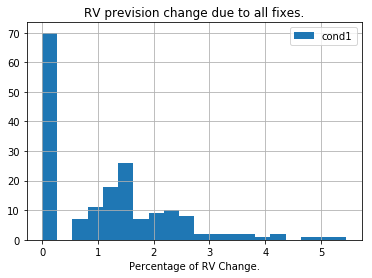

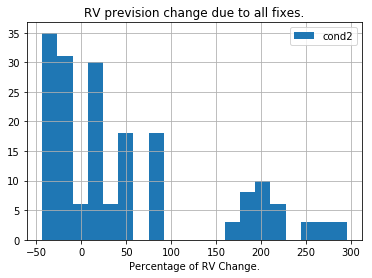

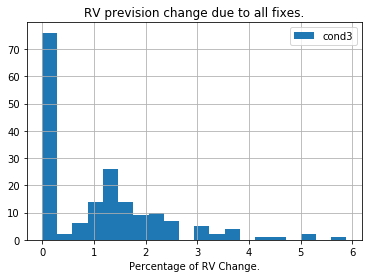

The majority of the changes comes from the bug in condition_2.


In [125]:
# Compare results of fixing clumping and changing the normalization. 
# Comapre between df_new and df_pub

# Calcualte percentage difference inc precsion of cond 1, 2, 3
# With 1 and 3 testing the normalization.
# Count number of percision in cond 2 that decreased
cond_1_up = (df_new["prec_1"] > df_pub["RV_Cond_1[m/s]"]).sum()
cond_1_down = (df_new["prec_1"] < df_pub["RV_Cond_1[m/s]"]).sum()
cond_2_up = (df_new["prec_2"] > df_pub["RV_Cond_2[m/s]"]).sum()
cond_2_down = (df_new["prec_2"] < df_pub["RV_Cond_2[m/s]"]).sum()
cond_3_up = (df_new["prec_3"] > df_pub["RV_Cond_3[m/s]"]).sum()
cond_3_down = (df_new["prec_3"] < df_pub["RV_Cond_3[m/s]"]).sum()
print("Number of Simulations that improve precision from all fixes = {}".format(cond_1_down))
print("Number of Simulations that worsen precision from all fixes = {}".format(cond_1_up))
print("Number of Simulations that improve precision from all fixes = {}".format(cond_2_down))
print("Number of Simulations that worsen precision from all fixes = {}".format(cond_2_up))
print("Number of Simulations that improve precision from all fixes = {}".format(cond_3_down))
print("Number of Simulations that worsen precision from all fixes = {}".format(cond_3_up))


# Percentage of change
# 100 * (new - old) / old
all_cond1_percent_diff = 100 * (df_new["prec_1"] - df_pub["RV_Cond_1[m/s]"]) / df_pub["RV_Cond_1[m/s]"]
all_cond2_percent_diff = 100 * (df_new["prec_2"] - df_pub["RV_Cond_2[m/s]"]) / df_pub["RV_Cond_2[m/s]"]
all_cond3_percent_diff = 100 * (df_new["prec_3"] - df_pub["RV_Cond_3[m/s]"]) / df_pub["RV_Cond_3[m/s]"]

all_cond1_percent_diff.hist(bins=20, label="cond1")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to all fixes.")
plt.show()

all_cond2_percent_diff.hist(bins=20, label="cond2")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to all fixes.")
plt.show()

all_cond3_percent_diff.hist(bins=20, label="cond3")
plt.xlabel("Percentage of RV Change.")
plt.legend()
plt.title("RV prevision change due to all fixes.")
plt.show()


print("The majority of the changes comes from the bug in condition_2.")

In [126]:
# Find the large discrepencies in precision  >50 %erc

# Find the extreme changing precisions

percentage_lim = 200
mask = all_cond2_percent_diff > percentage_lim
dict_for_df = {"Simulation": df_new.Simulation[mask],
               "pub_cond_2": df_pub["RV_Cond_2[m/s]"][mask],
               "new_cond_2": df_new.prec_2[mask],
               "pub_cond_1": df_pub["RV_Cond_1[m/s]"][mask],
               "new_cond_1": df_new.prec_1[mask],
               "pub_cond_3": df_pub["RV_Cond_3[m/s]"][mask],
               "new_cond_3": df_new.prec_3[mask]}

# print(df_new.Simulation[all_cond1_percent_diff > 2])
df_large = pd.DataFrame(dict_for_df)  # print(df_new.Simulation[all_cond3_percent_diff > 2])
cols = df_large.columns.tolist()
new_cols = ['Simulation', 'pub_cond_1', 'new_cond_1', 'pub_cond_2', 'new_cond_2', 'pub_cond_3', 'new_cond_3']
df_large = df_large[new_cols]  # Reorder columns
print("Simulations that have a large change in precision for condition 2.")
df_large.head()

# Most large changes in precision from the K band.

Simulations that have a large change in precision for condition 2.


,Simulation,pub_cond_1,new_cond_1,pub_cond_2,new_cond_2,pub_cond_3,new_cond_3
36,M0-K-1.0-60k,13.4,13.5,15.5,60.1,14.4,14.5
37,M0-K-1.0-80k,9.2,9.2,10.5,41.4,9.8,9.8
38,M0-K-1.0-100k,7.1,7.1,8.1,32.0,7.6,7.6
39,M0-K-5.0-60k,20.7,20.9,23.9,88.1,22.1,22.3
40,M0-K-5.0-80k,16.0,16.1,18.4,68.9,17.1,17.2


In [127]:
cols = df_large.columns.tolist()
new_cols = ['Simulation', 'pub_cond_1', 'new_cond_1', 'pub_cond_2', 'new_cond_2', 'pub_cond_3', 'new_cond_3']

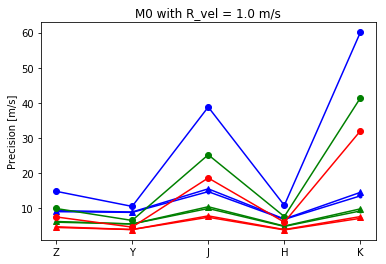

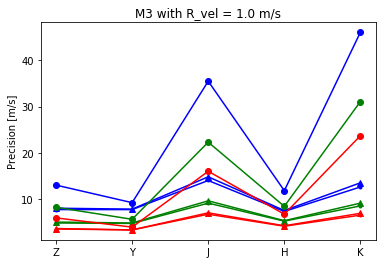

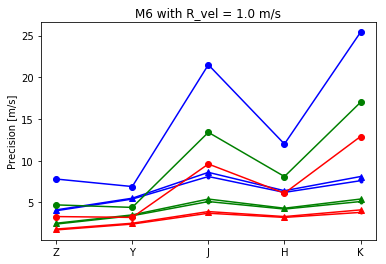

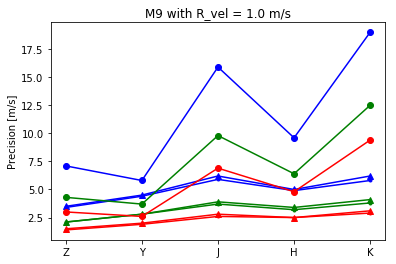

In [128]:
# Plot out RV values 

res_colour = {"60k": "blue", "80k": "green", "100k": "red"}
cond_marker = {1: ".", 2: "o",3: "^"}
band_loc = {"Z": 1,"Y": 2,"J": 3,"H": 4,"K": 5}
conditions = {1: ["prec_1"], 2: ["prec_2"], 3: ["prec_3"]}

vel = 1.0
#for b in "ZYJHK":
for star in ["M0", "M3", "M6", "M9"]:
    #plt.figure()
    for res in ["60k", "80k", "100k"]:
        for cond in range(1, 4):
            x_vals = [band_loc[b] for b in "ZYJHK"]
            ids = ["{0:s}-{1:s}-{2:.1f}-{3}".format(star, b, vel, res) for b in "ZYJHK"]
            
            df_masks = [df_new.Simulation == id for id in ids]
            # .iat[0,0] gives the first(only element) in dataframe created by mask of index
            rv_vals = [df_new[conditions[cond]][mask].iat[0,0] for mask in df_masks]
            plt.plot(x_vals, rv_vals, marker=cond_marker[cond], color=res_colour[res])
            plt.xticks(x_vals, [b for b in "ZYJHK"])
    plt.ylabel("Precision [m/s]")
    plt.title("{0} with R_vel = {1} m/s".format(star, vel))
    plt.show()